In [2]:
# Importing packages for use
import numpy as np
import pandas as pd
import os
import chardet 
import matplotlib.pyplot as plt
import seaborn as sns
import dexplot as dxp
import math 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Processed Data
sourcepath = "D:\Work\Research\Dropbox\Machine Learning\Side Projects\Employee Churn IBM\employee_churn_prediction_ibm"
datapath = os.path.join(sourcepath, "data", "processed", "IBM_HR_Data_Cleaned.csv")

IBMData = pd.read_csv(datapath)

# Defining some other paths
graphpath = os.path.join(sourcepath, "reports", "figures") 

In [4]:
IBMData.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                     int64
EducationField               object
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                  float64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
OverTime                     object
PercentSalaryHike           float64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance             

### Exploring Summary Statistics of Dependent and Independent Variable

#### List of Analyses:
* Proportion of workers leaving
* Summary Statistics of Numeric and Categorical Explanatory Variables 
* Relation between Explanatory Variables 
* Proportion of workers leaving by categorical and numeric explanatory variables

#### (1) Proportion of Workers Leaving

Proportion of Workers Leaving and Staying:
No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


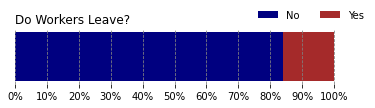

In [5]:
# (1a) Looking at the raw fraction of employees attrition
print('Proportion of Workers Leaving and Staying:')
print(IBMData.Attrition.value_counts()/IBMData.shape[0])

# (1b) Plotting the fraction of employees attrition
df_grouped = IBMData['Attrition'].value_counts()/len(IBMData)
fracLeave = pd.DataFrame({df_grouped.index[0]: [df_grouped[0]], df_grouped.index[1]: [df_grouped[1]]})
fields = fracLeave.columns.to_list()
colors = ['navy', 'brown']
left = len(fracLeave)*[0]

fig, ax = plt.subplots(1, figsize = (6,1))
# This loop plots bars for each category to the right one by one with the location being given by 'left'
for idx, name in enumerate(fields):
    plt.barh(fracLeave.index, fracLeave[name], left = left, color = colors[idx])
    left = left + fracLeave[name]
# Assigning a title to the plot    
plt.title('Do Workers Leave?', loc = 'left')
# Assigning plot legend and location
plt.legend(fracLeave.columns.to_list(), ncol = 4, frameon = False, bbox_to_anchor = ([0.7, 1.0, 0., 0.]))
# Dropping plot spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# Formatting x ticks 
xticks = np.arange(0,1.1,0.1)
xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
plt.xticks(xticks, xlabels)
# Formatting y ticks
ax.get_yaxis().set_ticks([])
# Generating grid lines 
ax.xaxis.grid(color='gray', linestyle='dashed')
# Showing the plot
plt.show()
# Saving the plot
fig.savefig(os.path.join(graphpath, 'Frac_Workers_Leaving.png'), bbox_inches = 'tight')

# Deleting the temporarily created data objects
del [df_grouped, fracLeave, fields, colors, left, idx, name, fig, ax]

#### (2) Summary Statistics of Explanatory Variables (Numeric + Categorical)

#### (2.a) Summary Statistics of Numeric Variables

In [6]:
# Summary Statistics of Numeric Variables

numvarlist = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked',
              'PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole',
              'YearsSinceLastPromotion','YearsWithCurrManager']

print('Descriptive Summary Statistics of Numeric Variables:')
numvarStats = IBMData[numvarlist].describe().transpose()
numvarStats

Descriptive Summary Statistics of Numeric Variables:


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.00,40.0
TrainingTimesLastYear,1470.0,2.799320,1.289271,0.0,2.0,3.0,3.00,6.0


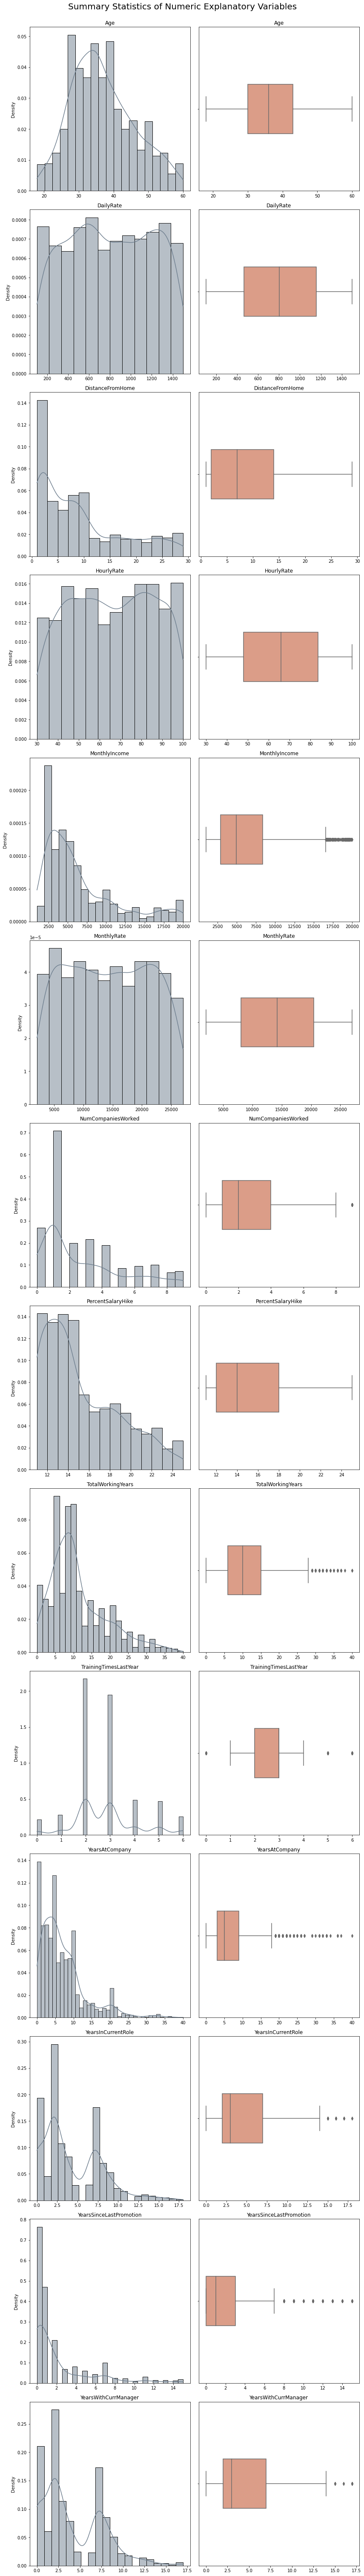

In [7]:
# Summary Statistics of Numeric Variables represented as plots
# Two types of plots shown for each variable: histogram with the mean and median values, and box plot  
fig = plt.figure(figsize = (6*2, 6*len(numvarlist)))
for i, item in enumerate(numvarlist):
    plt.subplot(len(numvarlist),2,i*2+1)
    g = sns.histplot(IBMData, x = numvarlist[i], stat = 'density', kde = True, color = 'slategrey')
    g.set_title(numvarlist[i])
    g.set_xlabel('')
    
    plt.subplot(len(numvarlist),2,i*2+2)
    g = sns.boxplot(IBMData[numvarlist[i]], color = 'darksalmon', width = 0.3, orient = 'v')
    #g = sns.swarmplot(IBMData[numvarlist[i]], color = '0.25')
    g.set_title(numvarlist[i])
    g.set_xlabel('')
plt.suptitle('Summary Statistics of Numeric Explanatory Variables', fontsize = 20, y = 1.0)   
plt.tight_layout()    
fig.savefig(os.path.join(graphpath, 'SummaryStats_NumericVars.png'), bbox_inches = 'tight')

#### (2.b) Summary Statistics of Numeric Variables

In [8]:
# Show the proportion of observations in each level of each categorical variable
catvarlist = [item for item in IBMData.columns.to_list() if item not in numvarlist and item != 'Attrition' and item != 'EmployeeNumber']

# Now show the proportions
for item in catvarlist:
    print('Proportion of observations in each level of variable: ', item)
    print(IBMData[item].value_counts().sort_index()/len(IBMData))
    print()

Proportion of observations in each level of variable:  BusinessTravel
Non-Travel           0.102041
Travel_Frequently    0.188435
Travel_Rarely        0.709524
Name: BusinessTravel, dtype: float64

Proportion of observations in each level of variable:  Department
Human Resources           0.042857
Research & Development    0.653741
Sales                     0.303401
Name: Department, dtype: float64

Proportion of observations in each level of variable:  Education
1    0.115646
2    0.191837
3    0.389116
4    0.270748
5    0.032653
Name: Education, dtype: float64

Proportion of observations in each level of variable:  EducationField
Human Resources     0.018367
Life Sciences       0.412245
Marketing           0.108163
Medical             0.315646
Other               0.055782
Technical Degree    0.089796
Name: EducationField, dtype: float64

Proportion of observations in each level of variable:  EnvironmentSatisfaction
1    0.193197
2    0.195238
3    0.308163
4    0.303401
Name: Enviro

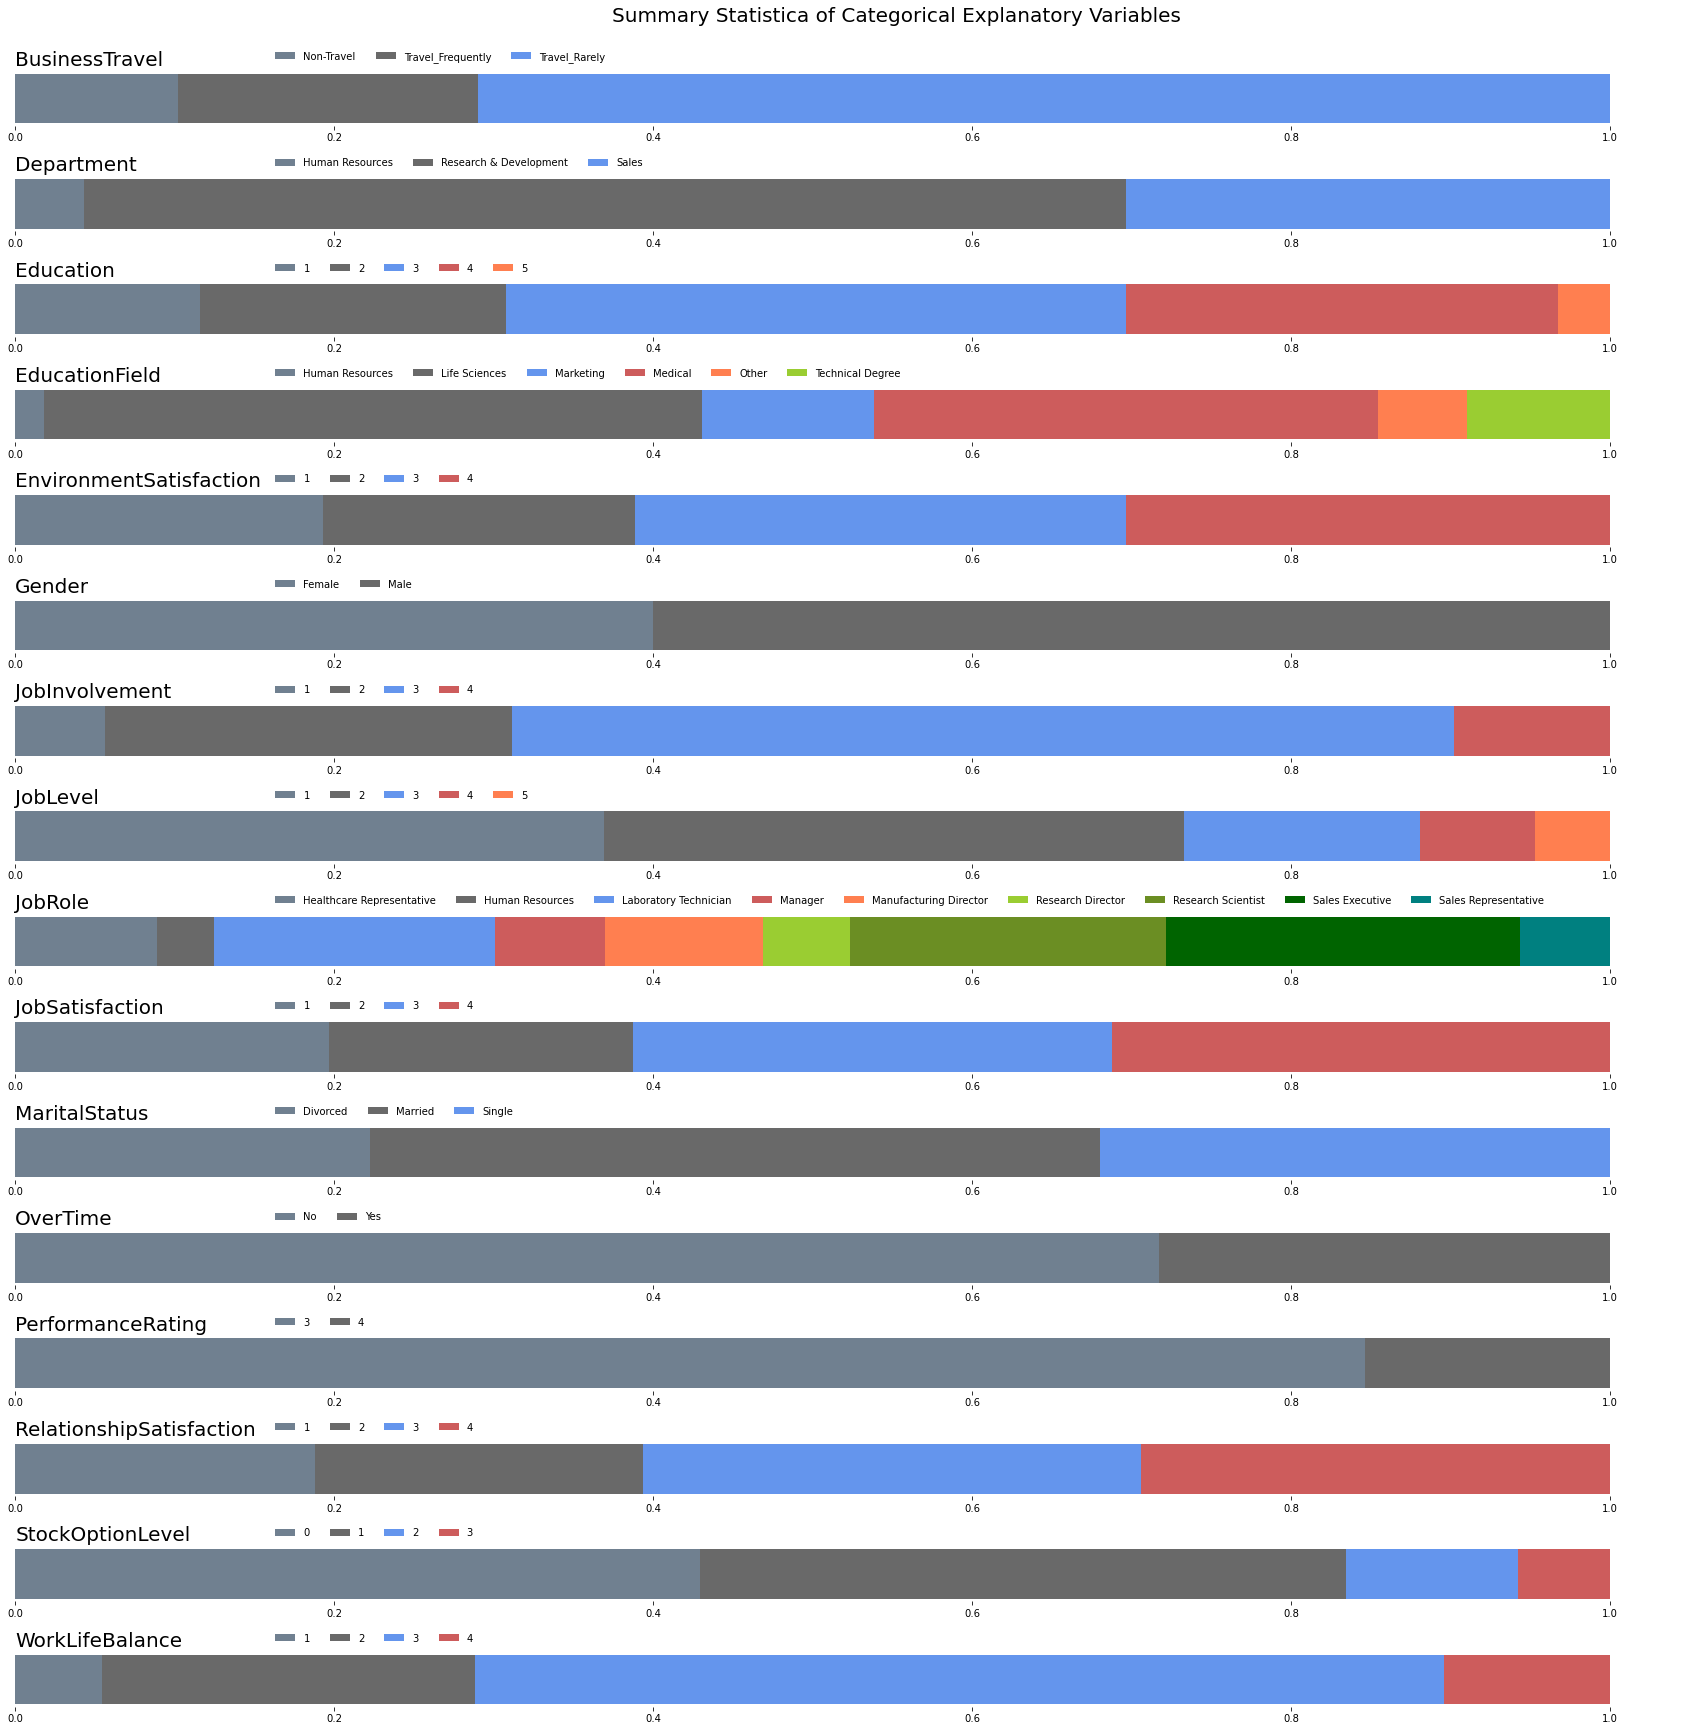

In [9]:
# Now show the proportion of observations in each categorical variable in a graph

# First create a function which takes in the right variable and produces the corresponding subplot
def plot_PropCatVar(IBMData, item, axes, colors):
    
    # First create the dataframe
    df_grouped = pd.DataFrame(IBMData[item].value_counts().sort_index()/len(IBMData)).transpose()
    fields = df_grouped.columns.to_list()
    # Now plot the bar and keep appending from the left 
    left = len(df_grouped)*[0]
    for idx, name in enumerate(fields):
        axes.barh(df_grouped.index, df_grouped[name], left = left, color = colors[idx], height = 0.5)
        left = left + df_grouped[name]
    axes.spines['right'].set_visible(False)
    axes.spines['left'].set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.spines['bottom'].set_visible(False)    
    axes.set_title(item, loc = 'left', fontsize = 20)
    axes.legend(fields, ncol = IBMData[item].nunique(), frameon = False, 
                bbox_to_anchor = ([0.15, 1.0, 0., 0.])) 
    axes.set_yticks([])  
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]

colors = ['slategray','dimgray','cornflowerblue','indianred','coral','yellowgreen','olivedrab','darkgreen','teal']    
fig, ax = plt.subplots(nrows = len(catvarlist), ncols = 1, figsize = (25, 1.5*len(catvarlist)))
for i, axes in enumerate(ax.flatten()):
    plot_PropCatVar(IBMData, catvarlist[i], axes, colors)
plt.suptitle('Summary Statistica of Categorical Explanatory Variables', fontsize = 20, y = 1.0)    
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(graphpath, 'SummaryStats_CategoricalVars.png'), bbox_inches = 'tight')

#### (3) Relationship Between Explanatory Variables

#### (3.a) Bivariate Scatter Plots of Numeric Variables

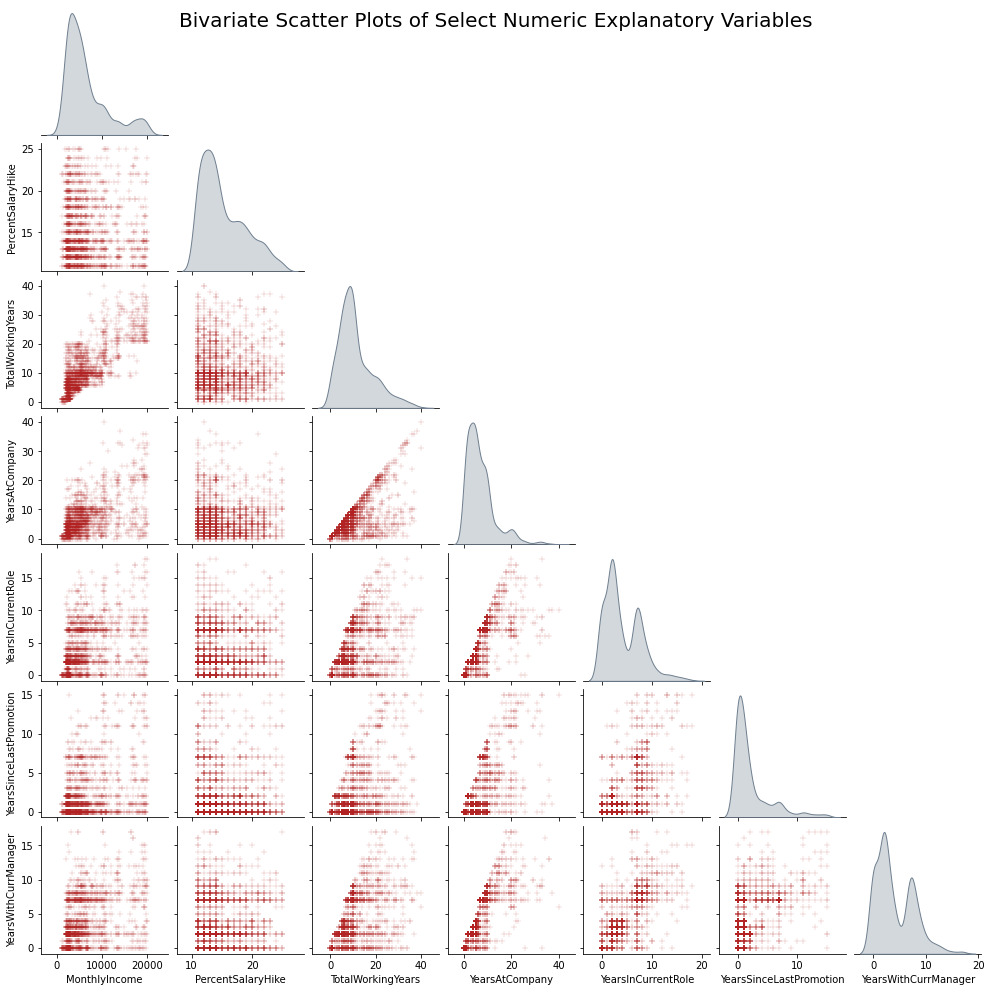

In [26]:
# Pair-wise Scatter Plots of selected numeric variables
selectnumvarlist = ['MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany',
                    'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
g = sns.pairplot(IBMData[selectnumvarlist], markers = '+', height = 2., aspect = 1., corner = True, 
                 diag_kind = 'kde', plot_kws={'color':'firebrick','alpha':0.3}, diag_kws={'color':'slategrey','alpha':0.3})
g.fig.suptitle('Bivariate Scatter Plots of Select Numeric Explanatory Variables', fontsize = 20)
g.fig.savefig(os.path.join(graphpath,'BivariateNumericVars.png'))

#### (3.b) Bivariate Scatter Plots of Numeric Variables [With Categorical Variable Demarcations]

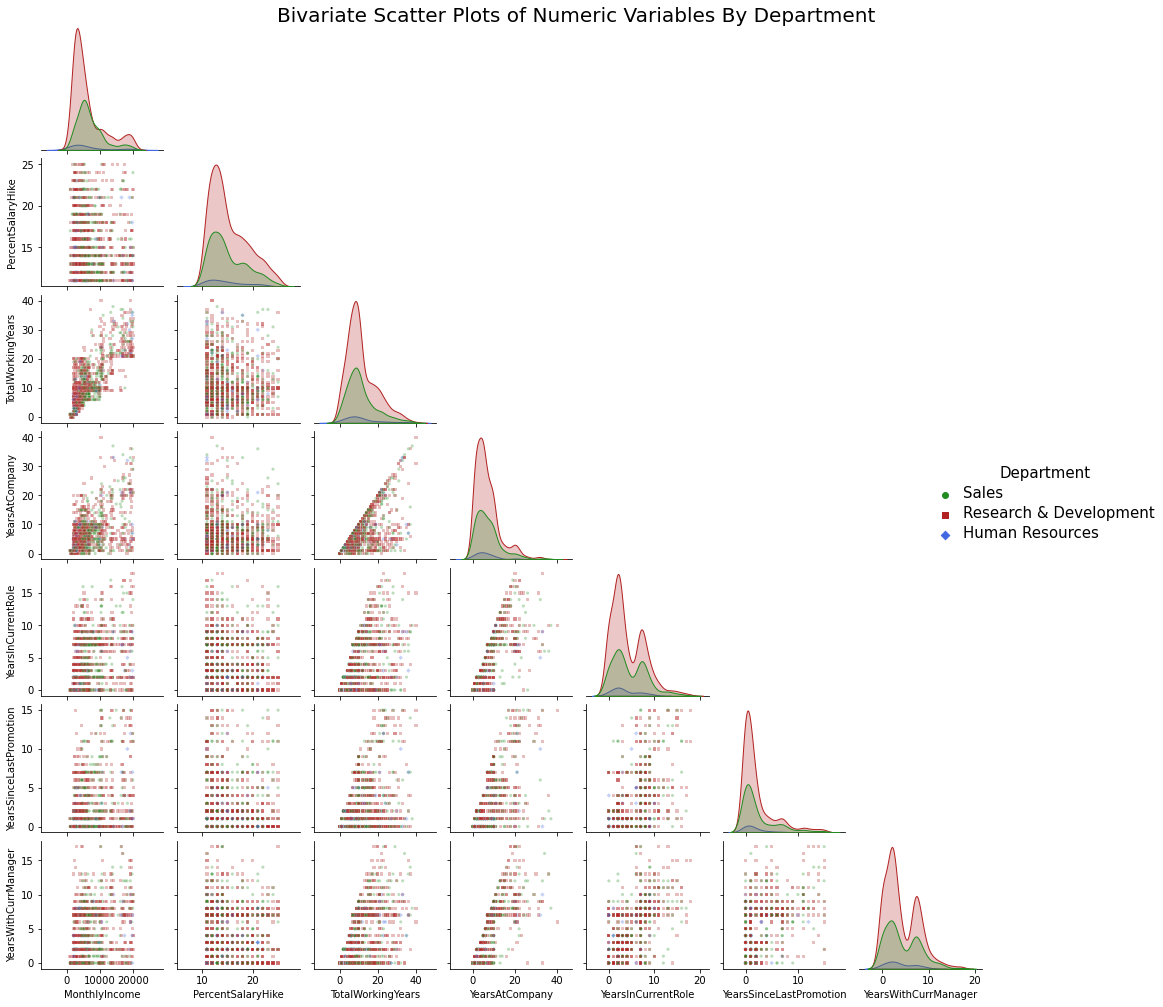

In [61]:
# Plot the bivariate scatter for numeric variables with one categorical variable demarcation
g = sns.pairplot(IBMData[selectnumvarlist+['Department']], corner = True, diag_kind = 'kde', height = 2., aspect = 1., 
                 hue = 'Department', markers = ['o','s','D'], palette = ['forestgreen','firebrick','royalblue'],
                 plot_kws={'alpha':0.3,'s':10})
plt.setp(g._legend.get_texts(), fontsize = 15.)
plt.setp(g._legend.get_title(), fontsize = 15.)
g.fig.suptitle('Bivariate Scatter Plots of Numeric Variables By Department', fontsize = 20, y = 1.)
g.fig.savefig(os.path.join(graphpath,'BivariateNumericVars_ByDepartment.png'))

#### (3.c) Plots of a numeric variable against one or more categorical variables 

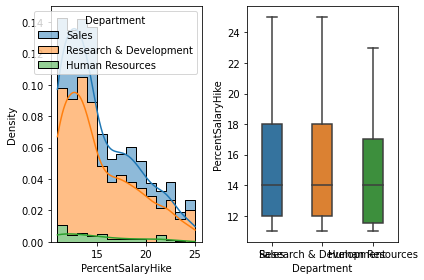

In [78]:
## First plot histograms and boxplots of a numeric variable against categorical variables
## Numeric Variables to be plotted: PercentSalaryHike, Categorical Variable to be plotted: Department, Gender 

fig = plt.subplots()

plt.subplot(121)
sns.histplot(IBMData[['PercentSalaryHike','Department']], x = 'PercentSalaryHike', hue = 'Department', 
             stat = 'density', element = 'step', kde = True, cbar_kws = {'alpha':0.2}, multiple = 'stack')
plt.subplot(122)
g = sns.boxplot(data = IBMData[['PercentSalaryHike','Department']], y = 'PercentSalaryHike', x = 'Department', 
               width = 0.4, saturation = 0.7)
plt.close(2)
plt.close(3)
plt.tight_layout()
plt.show()

#### (2) Proportion of Workers Leaving By Categorical Variables

In [5]:
# Identify the variables by which the proportion of workers leaving to be computed
varlist = ['Gender', 'Department', 'EducationField', 'Education', 'JobRole', 'JobLevel', 'JobInvolvement', 'JobSatisfaction', 
          'EnvironmentSatisfaction', 'MaritalStatus', 'WorkLifeBalance', 'BusinessTravel', 'OverTime', 'StockOptionLevel']
# First compute the proportion by variables
for item in varlist:
    print('Proportion of workers leaving by: ', item)
    newframe = IBMData.groupby(item)['Attrition'].value_counts()
    print(newframe.groupby(level=0).apply(lambda x: 100.*x/x.sum())) # level=0 implies that grouping happens by the first of the index
    print()

Proportion of workers leaving by:  Gender
Gender  Attrition
Female  No           85.204082
        Yes          14.795918
Male    No           82.993197
        Yes          17.006803
Name: Attrition, dtype: float64

Proportion of workers leaving by:  Department
Department              Attrition
Human Resources         No           80.952381
                        Yes          19.047619
Research & Development  No           86.160250
                        Yes          13.839750
Sales                   No           79.372197
                        Yes          20.627803
Name: Attrition, dtype: float64

Proportion of workers leaving by:  EducationField
EducationField    Attrition
Human Resources   No           74.074074
                  Yes          25.925926
Life Sciences     No           85.313531
                  Yes          14.686469
Marketing         No           77.987421
                  Yes          22.012579
Medical           No           86.422414
                  Yes  

In [6]:
# # Now plot the proportion of worker leaving by each of the categorical variables above in the same plot

# # First define a function which takes in each of the categorical variable and then plots the corresponding subplot
# def plot_fracLeave(catvar, colors, serialnum, axes, maxcat):
    
#     # First create a dataframe containing the levels of the categorical variable in rows and leaving in columns
#     df_grouped = IBMData.groupby(catvar)['Attrition'].value_counts()
#     df_grouped = df_grouped.groupby(level=0).apply(lambda x: x/x.sum()).unstack(1).sort_values([catvar])  
    
#     # Now plot the values in subplots
#     fields = df_grouped.columns.to_list()
#     left = len(df_grouped)*[0]
#     for idx, name in enumerate(fields):
#         axes.barh(df_grouped.index, df_grouped[name], left = left, color = colors[idx], height = 0.5, label = serialnum)
#         left = left + df_grouped[name]
#     axes.set_ylim(-0.5,maxcat-0.5)    
#     axes.set_title(catvar, loc = 'left', fontsize = 18)
#     #axes.legend(fields, ncol = 10, frameon = False, bbox_to_anchor = ([0.4, 1.0, 0., 0.]))
#     xticks = np.arange(0,1.1,0.1)
#     xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
#     axes.set_xticks(xticks, xlabels)
#     handles, labels = axes.get_legend_handles_labels()
#     return handles, labels

# maxcat = 0
# for item in varlist:
#     if IBMData[item].nunique() > maxcat:
#         maxcat = IBMData[item].nunique()
# numcols = 3    
# fig, ax = plt.subplots(nrows = math.ceil(len(varlist)/numcols), ncols = numcols, figsize = (20, 30), sharex = True)    
# for counter, axes in enumerate(ax.flatten()):
#     if counter+1 <= len(varlist):
#         handles, labels = plot_fracLeave(varlist[counter], ['navy','brown'], counter, axes, maxcat)
# if len(varlist) < math.ceil(len(varlist)/numcols)*numcols:
#     for i in np.arange(math.ceil(len(varlist)/numcols)*numcols-len(varlist)):
#         fig.delaxes(ax[math.ceil(len(varlist)/numcols)-1][numcols-i-1])
# plt.tight_layout()        
# fig.suptitle('Do Workers Leave?', fontsize = 20, y = 1.05)
# fig.legend(handles, ['No', 'Yes'], loc = 'upper left', ncol = 2, frameon = False, prop = {'size': 15})  
# plt.show()    
# fig.savefig(os.path.join(graphpath, 'Frac_Workers_Leaving_ByCatVar.png'), bbox_inches = 'tight')

In [13]:
# Proportion of workers who leave by each categorical variable in the dataset 
varlist = ['Gender', 'Department', 'EducationField', 'Education', 'JobRole', 'JobLevel', 'JobInvolvement', 'JobSatisfaction', 
          'EnvironmentSatisfaction', 'MaritalStatus', 'WorkLifeBalance', 'BusinessTravel', 'OverTime', 'StockOptionLevel']
#varlist = ['Gender', 'Department']
# numcols = 3
# numrows = (len(varlist)%numcols == 0)*int(len(varlist)/numcols)+(len(varlist)%numcols!=0)*(math.ceil(len(varlist)/numcols))
# fig, ax = plt.subplots(nrows = numrows, ncols = numcols, figsize = (numcols*6, numrows*6))
# for i, _ in enumerate(ax.flatten()):
#     if(i+1<=len(varlist)):
        
#         item = varlist[i]
#         # First Create the data frame 
#         df_grouped = IBMData.groupby(item)['Attrition'].value_counts()
#         df_grouped = df_grouped.groupby(level=0).apply(lambda x: x/x.sum()).unstack(1).sort_values(item)
#         df_grouped = pd.DataFrame(df_grouped.iloc[:,1]).reset_index()
        
#         if(df_grouped[item].dtypes == 'object'):
#             sns.catplot(data = df_grouped, y = item, x = 'Yes', kind = 'bar', palette="ch:.25", ax = ax[i])
#             plt.close(2)
#         else:
#             sns.catplot(data = df_grouped, y = item, x = 'Yes', kind = 'bar', orient = 'h', palette="ch:.25", ax = ax[i])   
#             plt.close(2)
#     plt.show() 
            

In [ ]:
cmaps = ['Sequential']